## Online Shoppers Intention - Predictive Analysis

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. 
The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.


### Problem Statement

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. 


In [1]:
#import python libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import other libraries....
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

### Data Description

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.



### Data Inspection & Manipulation

In [2]:
pwd()

'C:\\Users\\HP ELITEBOOK'

In [3]:
# Load online fraud payment data set

shoppers = pd.read_csv(r'C:\Users\HP ELITEBOOK\Documents\10Alytics - Data Science\Python\Online Shoppers Intention _ Predictive Analysis\online_shoppers_intention.csv')
shoppers.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shoppers.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
# display information about dataset

shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# shape of data

shoppers.shape

(12330, 18)

In [7]:
# check for missing values

shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:title={'center':'Missing Data'}>

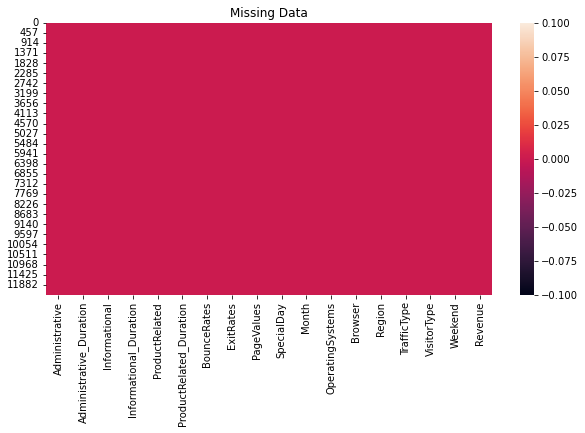

In [8]:
# visualise for missing values

plt.figure(figsize=(10,5))
plt.title('Missing Data')
sns.heatmap(shoppers.isnull())

### Observations

No missing Values

Data has 12330 rows and 18 columns

In [9]:
# descriptive statistics

shoppers.describe().astype('int')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
mean,2,80,0,34,31,1194,0,0,5,0,2,2,3,4
std,3,176,1,140,44,1913,0,0,18,0,0,1,2,4
min,0,0,0,0,0,0,0,0,0,0,1,1,1,1
25%,0,0,0,0,7,184,0,0,0,0,2,2,1,2
50%,1,7,0,0,18,598,0,0,0,0,2,2,3,2
75%,4,93,0,0,38,1464,0,0,0,0,3,2,4,4
max,27,3398,24,2549,705,63973,0,0,361,1,8,13,9,20


### Exploratory Data Analysis

In [10]:
# univariate analysis cells


shoppers.VisitorType.value_counts()


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Text(0.5, 1.0, 'Visitor Type')

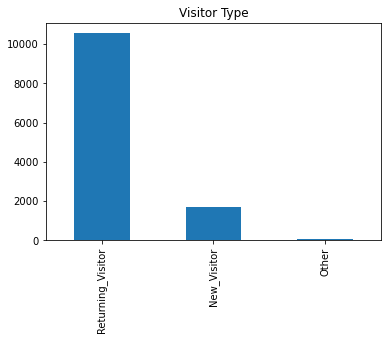

In [11]:
shoppers.VisitorType.value_counts().plot.bar()
plt.title('Visitor Type')

The website had more returning visitors than new visitors and others.

Text(0.5, 1.0, 'Revenue')

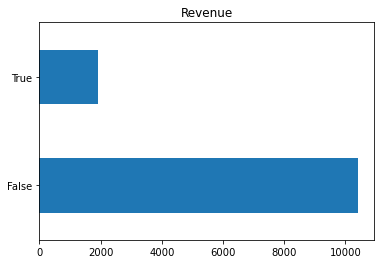

In [13]:
shoppers.Revenue.value_counts().plot.barh()
plt.title('Revenue')

We had more users not completing a purchase than users who did complete a purchase.


In [14]:
# total no. of pages visited by the users on the administrative page

shoppers['Administrative'].sum()

28546

In [15]:
# the average no. of pages visited by the users on the administrative page

round(shoppers['Administrative'].mean(),2)

2.32

In [16]:
# maximum no. of pages visited by the users on the administrative page

shoppers['Administrative'].max()

27

In [17]:
# the least no. of pages visited by the users on the administrative page

shoppers['Administrative'].min()

0

In [18]:
# maximum no. of duration spent by the users on the administrative page

max_duration = (shoppers['Administrative_Duration'].max())/60
round(max_duration, )

57

In [74]:
# total no. of duration spent by the users on the administrative page

tot_dur = (shoppers['Administrative_Duration'].sum())/3600
round(tot_dur, )

277

### Observations

Total number of administrative pages visited is 2856

Maximum number of administrative pages is 27 compare to the average number of 2 visited by the online shoppers, which shows a user is like to check 2 administrative pages on average with a duration of 1hour.

Users spent 277 hours on the administrative page during their online shopping while the maximum duration is 57mins.

In [19]:
# total no. of product pages visited by the user

tot_product = shoppers['ProductRelated'].sum()
tot_product

391249

In [20]:
# max no. of product pages visited by the user

max_pro = shoppers['ProductRelated'].max()
max_pro

705

In [75]:
# avg no. of product pages visited by the user

avg_pro = shoppers['ProductRelated'].mean()
round(avg_pro, )

32

In [76]:
# the total duration spent on the product pages

tot_dur = (shoppers['ProductRelated_Duration'].sum())/3600
round(tot_dur, )

4092

In [78]:
# the average duration spent by the user

avg_dur = (shoppers['ProductRelated_Duration'].mean())/60
round(avg_dur, )

20

### Observations

Users perused 391249 producted related pages during thier online visit 

A maximum number of pages visited by the user is 705 compared to the average of 32 by users.

Users spent more hours on the product related pages compared to every other pages on their website. A total duration of 4092 was spent by the online shoppers.


In [21]:
# total no. of informational pages visited by the user

tot_info = shoppers['Informational'].sum()
tot_info

6209

In [22]:
# maximum no. of informational pages visited by the user

max_info = shoppers['Informational'].max()
max_info

24

In [79]:
# total duration spent on the informational pages visited by the user

tot_info_dur = (shoppers['Informational_Duration'].sum())/3600
round(tot_info_dur, 2)

118.07

In [80]:
# average duration spent on the informational pages visited by the user

avg_info_dur = (shoppers['Informational_Duration'].mean())/60
round(avg_info_dur, 1)

0.6

In [81]:
# maximum duration spent on the informational pages visited by the user

max_info_dur = (shoppers['Informational_Duration'].max())/60
round(max_info_dur, 1)

42.5

### Observations

Total number of informational pages visited by the user is 6209 

The maximum number of informational pages visited by the user is 24 

A total of approximately 118 hours was spent on the informational pages by the users during their online shopping, with average of 0.6 minutes and on a maximum duration of approxomately 43 mins.

### Bivariate Analysis

In [23]:
# Administrative pages by month 

shoppers_mon = shoppers['Administrative'].groupby(shoppers.Month).sum().sort_index(ascending = True)[:10]
shoppers_mon

Month
Aug     1358
Dec     3793
Feb      100
Jul     1047
June     655
Mar     3600
May     6610
Nov     7847
Oct     2042
Sep     1494
Name: Administrative, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Administrative'>

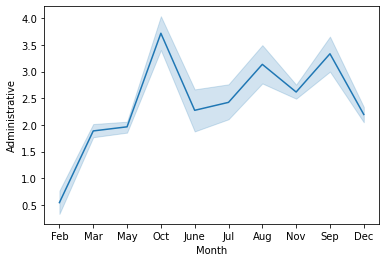

In [24]:
sns.lineplot(x=shoppers['Month'], y=shoppers['Administrative'])

In [25]:
# Administrative duration spent by month 

dur_mon = shoppers['Administrative_Duration'].groupby(shoppers.Month).sum().sort_index(ascending = True)[:10]
round(dur_mon, )

Month
Aug      46209.0
Dec     135799.0
Feb       3105.0
Jul      34074.0
June     17029.0
Mar     135838.0
May     233703.0
Nov     272618.0
Oct      69141.0
Sep      48978.0
Name: Administrative_Duration, dtype: float64

<AxesSubplot:ylabel='Month'>

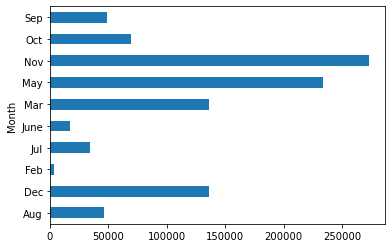

In [26]:
dur_mon.plot.barh()

In [27]:
# Region by traffic type

Region_traf = shoppers['Region'].groupby(shoppers.TrafficType).sum()
Region_traf

TrafficType
1      7862
2     12236
3      6092
4      3381
5       742
6      1500
7       102
8      1054
9       111
10     1354
11      791
12        3
13     2320
14       51
15      112
16       10
17        1
18       35
19       35
20     1015
Name: Region, dtype: int64

<AxesSubplot:xlabel='TrafficType'>

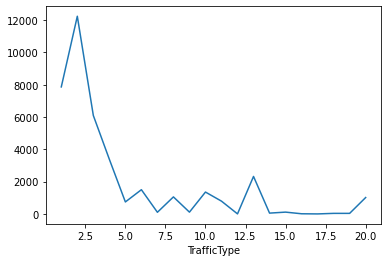

In [28]:
Region_traf.plot()

In [29]:
# administrative pages by region

admin_reg = shoppers['Administrative'].groupby(shoppers.Region).sum()
admin_reg

Region
1    10857
2     2731
3     5878
4     2722
5      783
6     1655
7     1792
8     1077
9     1051
Name: Administrative, dtype: int64

<AxesSubplot:xlabel='Region'>

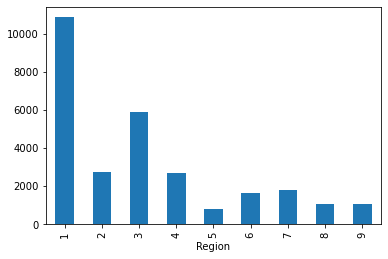

In [30]:
admin_reg.plot.bar()

In [31]:
# administrative pages by revenue

admin_rev = shoppers['Administrative'].groupby(shoppers.Revenue).sum()
admin_rev

Revenue
False    22071
True      6475
Name: Administrative, dtype: int64

<AxesSubplot:title={'center':'Admin Revenue'}, ylabel='Revenue'>

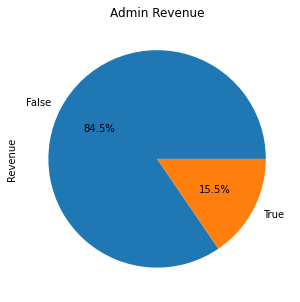

In [32]:
plt.figure(figsize = (10,5))
plt.title ("Admin Revenue")
shoppers['Revenue'].value_counts().plot.pie(autopct='%1.1f%%')

In [33]:
# administrative duration spent by visitors type

admin_dur_vis = (shoppers['Administrative_Duration'].groupby(shoppers.VisitorType).sum())/3600
admin_dur_vis

VisitorType
New_Visitor           43.249380
Other                  1.480313
Returning_Visitor    232.074049
Name: Administrative_Duration, dtype: float64

<AxesSubplot:ylabel='VisitorType'>

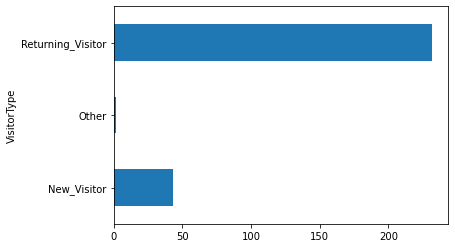

In [34]:
admin_dur_vis.plot.barh()

In [35]:
# administrative pages by visitors type

admin_vis = shoppers['Administrative'].groupby(shoppers.VisitorType).sum()
admin_vis

VisitorType
New_Visitor           4323
Other                  125
Returning_Visitor    24098
Name: Administrative, dtype: int64

Text(0.5, 0, 'Visitor_Type')

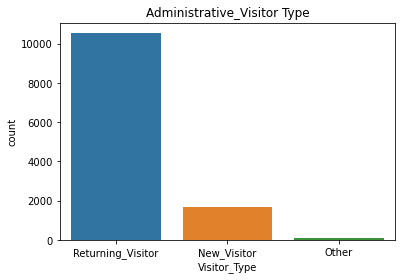

In [36]:
sns.countplot(x=shoppers['VisitorType'])
plt.title('Administrative_Visitor Type')
plt.xlabel('Visitor_Type')

In [37]:
# the number of product page visited by month

product_mon = shoppers['ProductRelated'].groupby(shoppers.Month).sum().sort_index(ascending = True)[:10]
product_mon

Month
Aug      16566
Dec      48347
Feb       2058
Jul      15728
June     10387
Mar      37775
May      89105
Nov     138024
Oct      18428
Sep      14831
Name: ProductRelated, dtype: int64

<AxesSubplot:ylabel='Month'>

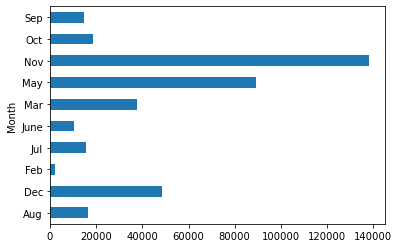

In [38]:
product_mon.plot.barh()

In [39]:
# the number of product page by visitor type 

pro_vtype = shoppers['ProductRelated'].groupby(shoppers.VisitorType).sum().sort_index(ascending = True)[:10]
pro_vtype

VisitorType
New_Visitor           30585
Other                  1060
Returning_Visitor    359604
Name: ProductRelated, dtype: int64

<AxesSubplot:title={'center':'Product by Visitor Type'}, ylabel='VisitorType'>

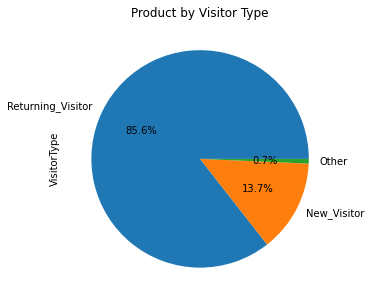

In [40]:
plt.figure(figsize = (10,5))
plt.title ("Product by Visitor Type")
shoppers['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='VisitorType', ylabel='Region'>

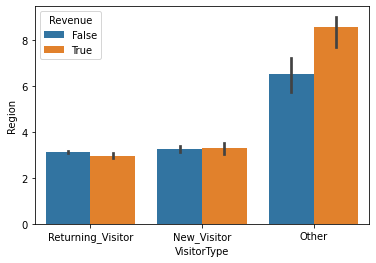

In [41]:
sns.barplot(x='VisitorType', y='Region', hue='Revenue', data=shoppers)


### Multivariate Analysis

<AxesSubplot:xlabel='VisitorType', ylabel='Administrative'>

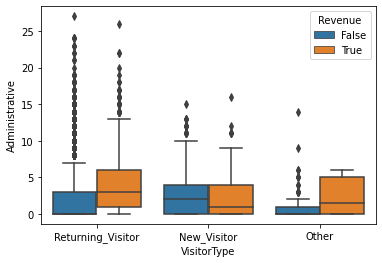

In [42]:
#multivariate analysis cells

sns.boxplot(x='VisitorType', y='Administrative', hue='Revenue', data=shoppers)

<AxesSubplot:>

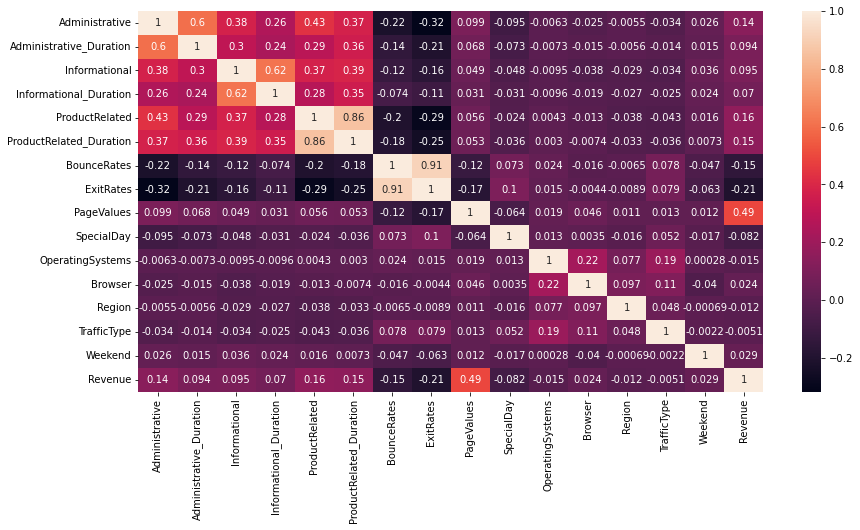

In [43]:
# Correlation using heat map

plt.figure(figsize=(14,7))
sns.heatmap(shoppers.corr(), annot=True)

### Modelling

### Feature Selection and Engineering

In [44]:
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [45]:
# Create a function that properly labels revenue, weekend and visitors type
def revenue(x):
    if x == True:
        return 1
    else:
        return 0
    
def weekend(x):
    if x == True:
        return 1
    else:
        return 0
    
# Create a new column
shoppers['revenue_new'] = shoppers['Revenue'].apply(revenue)

shoppers['weekend_new'] = shoppers['Weekend'].apply(weekend)

In [46]:
# drop columns: Revenue and Weekend

shoppers = shoppers.drop(['Revenue', 'Weekend'], axis = 1)
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,revenue_new,weekend_new
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,0,1


In [47]:
# use pd.get_dummies() for one hot encoding

categorical = ['Month', 'VisitorType']
category_dummies = pd.get_dummies(shoppers[categorical])

category_dummies.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [48]:
shoppers[categorical]

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor
...,...,...
12325,Dec,Returning_Visitor
12326,Nov,Returning_Visitor
12327,Nov,Returning_Visitor
12328,Nov,Returning_Visitor


In [49]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names

shoppers = pd.concat([shoppers, category_dummies], axis=1)

print(shoppers.shape)
shoppers.head()

(12330, 31)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [50]:

#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below

shoppers = shoppers.drop(categorical, axis = 1)
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
shoppers.shape

(12330, 29)

### Select Features

In [52]:

y = shoppers.revenue_new
X = shoppers.drop('revenue_new', axis=1)


In [53]:
print(X.head())
print(y.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0         0.20       0.20         0.0         0.0  ...          0           0   
1         0.00       0.10         0.0         0.0 

### Train Test And Split

In [54]:
#split into training and validation sets using a 30% split ratio

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [55]:
#import ML algorithms and initialise them

LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
models = [LR,KN,DC,RF]


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [58]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction, y_valid))
    plot_confusion_matrix(y_valid,prediction)


For LogisticRegression, Accuracy score is 0.8821303054879697 

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3402
           1       0.38      0.74      0.50       297

    accuracy                           0.88      3699
   macro avg       0.68      0.82      0.72      3699
weighted avg       0.93      0.88      0.90      3699



C:\Users\HP ELITEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


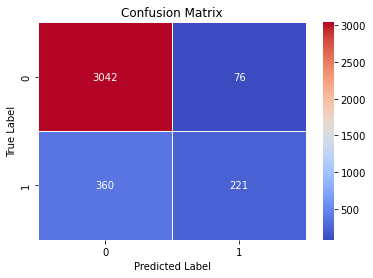


For KNeighborsClassifier, Accuracy score is 0.8540145985401459 

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      3438
           1       0.26      0.58      0.36       261

    accuracy                           0.85      3699
   macro avg       0.61      0.73      0.64      3699
weighted avg       0.91      0.85      0.88      3699



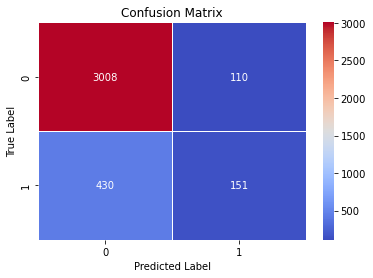


For DecisionTreeClassifier, Accuracy score is 0.8523925385239254 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3078
           1       0.56      0.53      0.55       621

    accuracy                           0.85      3699
   macro avg       0.74      0.72      0.73      3699
weighted avg       0.85      0.85      0.85      3699



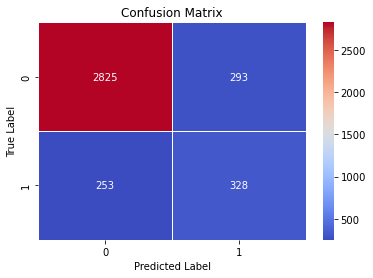


For RandomForestClassifier, Accuracy score is 0.902676399026764 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3280
           1       0.55      0.76      0.64       419

    accuracy                           0.90      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.92      0.90      0.91      3699



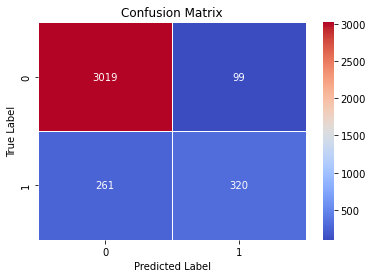

In [59]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

### Observations

Random Forest Classifier model had the best performance with 90% accuracy, 92% recall and 97% precision. 

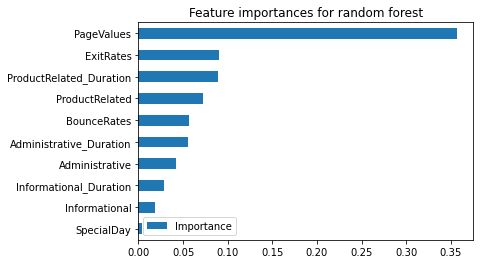

In [60]:
# get feature importances

RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

A bit of feature selection was done and our dataset showed page value, exit rates and producted realted duration account for the top 3 feature importance

In [61]:
#create a new X train with only 10 features

X_train2 = X_train[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'BounceRates', 
        'Administrative_Duration', 'Administrative', 'Informational_Duration', 'Informational', 'SpecialDay']]

X_train2.head(2)

,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,BounceRates,Administrative_Duration,Administrative,Informational_Duration,Informational,SpecialDay
8310,0.0,0.05,26.0,4,0.0,0.0,0,0.0,0,0.0
4039,0.0,0.20,0.0,2,0.2,0.0,0,0.0,0,0.0


In [62]:
X_valid2 = X_valid[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'BounceRates', 
        'Administrative_Duration', 'Administrative', 'Informational_Duration', 'Informational', 'SpecialDay']]

In [63]:
#train and predict
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.8942957556096243


### Observation

with the feature importance, we retrained the model using RFC and had an accuracy score of 89% meaning the top 10 feature account for 89% of the prediction of the model

### Evaluating Performance with Cross Validation

In [84]:
# evaluate your models using k-fold cross-validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [85]:
#create function to train a model with cross validations and evaluate accuracy

def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))
    

In [87]:
#train and predict, looping through the list of models

for model in models:
    trainer_with_cv(model, X_train2, y_train)

Accuracy: 0.883
Accuracy: 0.861
Accuracy: 0.854
Accuracy: 0.899


In [95]:
#create function to train a model with cross validations and evaluate accuracy

def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('Precision: %.3f' % (mean(scores)))

In [96]:
#train and predict, looping through the list of models

for model in models:
    trainer_with_cv(model, X_train2, y_train)

Precision: 0.733
Precision: 0.598
Precision: 0.526
Precision: 0.719


In [97]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('Recall: %.3f' % (mean(scores)))
  

In [98]:
#train and predict, looping through the list of models

for model in models:
    trainer_with_cv(model, X_train2, y_train)

Recall: 0.376
Recall: 0.286
Recall: 0.538
Recall: 0.561


### Observation

Furthermore, a k-cross validation was done to evaluate the performance of the best trained model to see if it can be generalized on a new data set when introduced, and we saw that it was approximately 90% accuratley predicted with a precision of 71% and a recall of 56% respectively.

### Conclusion

Random forest model classifier is the overall best for training our data set to accurately predict the online shoppers intention with a high recall of 76%; which is a good metric to help determine if the online shoppers will intend to shop on the website after browsing through all the pages.
It also shows that the model can fit and be trained on a new data set without overfitting or underfitting.